# Article Data EDA & Cleaning

---

The raw article dataset in 'articles.csv' has the following features and labels
###### Labels
- **bias** The bias score of the article
- **quality** The reliability score of the article

###### Features
- **article_id** The article's unique ID number
- **source_id** The unique ID number of the article's source
- **url** - The article's URL
- **score_count:** - ??? (I believe this may be the number of individual ratings of the article's bias and reliability)
- **domain** - The domain of the article's source
- **source** - The name of the article's source
- **image_path** - The relative path of the source's logo for the website
- **image_width** - The width of the source's logo image
- **image_height** - The height of the source's logo image
- **is_tv** - ???
- **reach** - ???
- **article_count** - The number of articles in the dataset from the article's source

### Read in data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

articles = pd.read_csv('../data/interim/articles.csv')
articles.head()

,article_id,source_id,url,bias,quality,score_count,domain,source,image_path,image_width,image_height,is_tv,reach,article_count
0,31,46,https://www.huffpost.com/entry/pete-buttigieg-...,-10.142857,46.915997,7,http://www.huffingtonpost.com/,Huffington Post,huffpost.png,45,45,0,0,30
1,97,46,https://www.huffpost.com/entry/elizabeth-warre...,-8.750000,36.750120,8,http://www.huffingtonpost.com/,Huffington Post,huffpost.png,45,45,0,0,30
2,186,46,https://www.huffpost.com/entry/usmca-north-ame...,-11.111111,41.320375,9,http://www.huffingtonpost.com/,Huffington Post,huffpost.png,45,45,0,0,30
3,236,46,https://www.huffpost.com/entry/john-bolton-tru...,-11.375000,37.876554,8,http://www.huffingtonpost.com/,Huffington Post,huffpost.png,45,45,0,0,30
4,260,46,https://www.huffpost.com/entry/beyonc%C3%A9-ja...,-10.500000,43.661313,8,http://www.huffingtonpost.com/,Huffington Post,huffpost.png,45,45,0,0,30


### Drop unneeded features

Currently, we know that we do not need the article_id, domain, image_path, image_width, and image_height features.

In [2]:
to_drop = ['article_id', 'domain', 'image_path', 'image_width', 'image_height']
articles.drop(to_drop, axis=1, inplace=True)
articles.head()

,source_id,url,bias,quality,score_count,source,is_tv,reach,article_count
0,46,https://www.huffpost.com/entry/pete-buttigieg-...,-10.142857,46.915997,7,Huffington Post,0,0,30
1,46,https://www.huffpost.com/entry/elizabeth-warre...,-8.750000,36.750120,8,Huffington Post,0,0,30
2,46,https://www.huffpost.com/entry/usmca-north-ame...,-11.111111,41.320375,9,Huffington Post,0,0,30
3,46,https://www.huffpost.com/entry/john-bolton-tru...,-11.375000,37.876554,8,Huffington Post,0,0,30
4,46,https://www.huffpost.com/entry/beyonc%C3%A9-ja...,-10.500000,43.661313,8,Huffington Post,0,0,30


Since we're focused on the articles themselves, more than one feature describing their sources is redundant and including these features would increase training time as well as lead to overfitting. As a result, we will drop the source, is_tv, reach, and article_count features.

In [3]:
to_drop = ['source_id', 'is_tv', 'reach', 'article_count']
articles.drop(to_drop, axis=1, inplace=True)
articles.head()

,url,bias,quality,score_count,source
0,https://www.huffpost.com/entry/pete-buttigieg-...,-10.142857,46.915997,7,Huffington Post
1,https://www.huffpost.com/entry/elizabeth-warre...,-8.750000,36.750120,8,Huffington Post
2,https://www.huffpost.com/entry/usmca-north-ame...,-11.111111,41.320375,9,Huffington Post
3,https://www.huffpost.com/entry/john-bolton-tru...,-11.375000,37.876554,8,Huffington Post
4,https://www.huffpost.com/entry/beyonc%C3%A9-ja...,-10.500000,43.661313,8,Huffington Post


In [4]:
articles.to_csv('../data/interim/articles_sources_removed.csv', index=False)

### Explore Features

In [5]:
articles.describe()

,bias,quality,score_count
count,5273.000000,5273.000000,5273.000000
mean,-0.912097,39.666050,3.560592
std,13.064812,10.726277,2.414819
min,-41.500000,-2.819029,1.000000
25%,-8.500000,32.609560,3.000000
50%,-1.333333,41.953319,3.000000
75%,3.000000,48.139045,4.000000
max,40.000000,63.224940,38.000000


In [6]:
articles.groupby('source').mean()

,bias,quality,score_count
source,,,
.6abc.com,1.000000,35.282252,3.000000
.abc7chicago.com,0.000000,51.076589,3.000000
.accountingtoday.com,0.000000,40.229584,3.000000
.allafrica.com,0.000000,48.295204,3.000000
.bjpenn.com,0.000000,37.345406,3.000000
...,...,...,...
newser,-10.000000,40.204322,3.000000
soompi,0.000000,37.197250,3.000000
the dodo,0.000000,34.587212,2.333333


ValueError: Could not interpret input 'source'

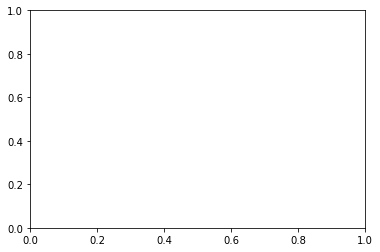

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(x='source', y='quality', hue='bias', data=articles.groupby('source').mean())
fig.set_size_inches(12, 12)
plt.show()